<a href="https://colab.research.google.com/github/erickgt00/Datos-Masivos/blob/main/Practica_Paralelizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1: Paralelizacion.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.

Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

## Lazy Variables

Estas son variables que se evalúan o inicializan solo cuando se accede a ellas por primera vez. En lugar de calcular o asignar un valor inmediatamente, se pospone la evaluación o inicialización hasta que sea necesario.

La idea detrás de las lazy variables es evitar cálculos innecesarios o costosos hasta el momento en que realmente se necesiten los resultados. Esto puede ser especialmente útil cuando trabajamos con problemas más grandes o complejos, donde realizar todos los cálculos de antemano podría llevar mucho tiempo o requerir muchos recursos.

El retraso es una técnica que permite posponer la evaluación de una expresión hasta que sea requerida. En Python, se puede implementar utilizando una función de orden superior llamada functools.partial junto con una función generadora (generator function) o una función lambda.

In [5]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time

In [7]:
import concurrent.futures

def e1(x):
    re1 = x + 2
    return re1

def e2(x):
    re2 = x * 4
    return re2

def e3(x):
    re3 = x - 5
    return re3

def e4(x):
    re4 = x ** 2
    return re4

# Lista de elementos a procesar
elementos = [1, 2, 3, 4, 5]

# Crear un executor para manejar los hilos de ejecución
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Ejecutar la etapa 1 en paralelo
    re1 = executor.map(e1, elementos)
    
    # Ejecutar la etapa 2 en paralelo utilizando los resultados de la etapa 1
    re2 = executor.map(e2, re1)
   
    # Ejecutar la etapa 3 en paralelo utilizando los resultados de la etapa 2
    re3 = executor.map(e3, re2)
    
    # Ejecutar la etapa 4 en paralelo utilizando los resultados de la etapa 3
    re4 = executor.map(e4, re3)

# Obtener los resultados finales
for resultado in re4:
    print(resultado)



49
121
225
361
529


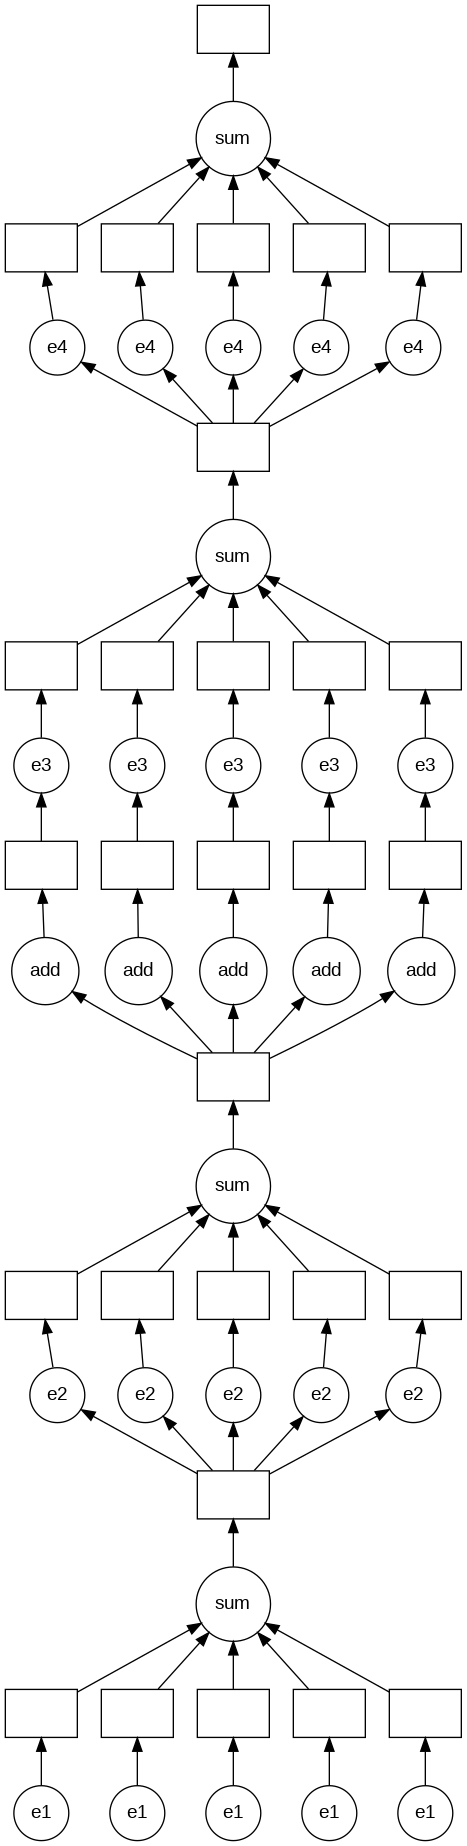

In [9]:
p1 = [delayed(e1)(i) for i in elementos]
total = delayed(sum)(p1)

elementos2 = [delayed(e2)(k, total) for k in elementos]
total2 = delayed(sum)(elementos2)

elementos3 = [delayed(e3)(k,total2+k) for k in elementos]
total3 = delayed(sum)(elementos3)

elementos4 = [delayed(e4)(k,total3) for k in elementos]
total4 = delayed(sum)(elementos4)

total4.visualize()